In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
# s=Service(ChromeDriverManager().install())
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
from bs4 import BeautifulSoup
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import TimeoutException
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
driver = webdriver.Edge()
driver.get('https://www.instagram.com/')

In [3]:
wait = WebDriverWait(driver,20)

In [4]:
#enter username
a  = wait.until(EC.presence_of_element_located((By.NAME, "username")))
a.send_keys("rohansaini0408")
time.sleep(2)

#enter password
a = driver.find_element(By.NAME, "password")
a.send_keys("insta@zx12")
time.sleep(2)

#click on submit button
a  = wait.until(EC.presence_of_element_located((By.TAG_NAME, "button")))
a.submit()
time.sleep(10)

In [5]:
# close pop up (aksing do you want to save password)

try:
    b = wait.until(EC.presence_of_element_located((By.CLASS_NAME, "_ac8f")))
    # b = driver.find_element(By.CLASS_NAME, "_ac8f")
    b.click()
    time.sleep(2)
except TimeoutException:
    print('No Pop up to save password') 

    
# close notification pop up
a = wait.until(EC.presence_of_all_elements_located((By.TAG_NAME, "button")))[-1]
a.click()
time.sleep(2)

# 1. Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.

### 1.1 From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [9]:
# open search button
a = wait.until(EC.presence_of_element_located((By.XPATH, "//div[@class='x1iyjqo2 xh8yej3']/div[2]")))
a.click()

# search for food

c = wait.until(EC.presence_of_element_located((By.XPATH, "//div[@class = 'xjoudau x6s0dn4 x78zum5 xdt5ytf x1c4vz4f xs83m0k xrf2nzk x1n2onr6 xh8yej3 x1hq5gj4']/input")))
c.send_keys("food")
time.sleep(3)

In [23]:
b = wait.until(EC.presence_of_all_elements_located((By.XPATH, "//div[@class = 'x6s0dn4 x78zum5 xdt5ytf x5yr21d x1odjw0f x1n2onr6 xh8yej3']/div/a/div/div/div/div[2]/div/div/div/span")))
user_ids = []
count = 0
for i in b:
    if count==10:
        break
    elif i.get_attribute('innerHTML') != 'food':
        user_ids.append(i.get_attribute('innerHTML'))
        count+=1

In [24]:
user_ids

['foodpharmer',
 'foodtalkindia',
 'food_tour_ent',
 'indorefoodexplorer',
 'food_impramation',
 'indian_tasty_food',
 'foodfactory.jabalpur',
 'foodclicks01',
 'indore_streetfood',
 'dilsefoodie']

In [ ]:
#for top 5 followers
all_followers = []
for m in user_ids:
    
    # open search button
    open1 = wait.until(EC.presence_of_element_located((By.XPATH, "//div[@class='x1iyjqo2 xh8yej3']/div[2]")))
    open1.click()
    time.sleep(5)
    
    # search for food
    c = wait.until(EC.presence_of_element_located((By.XPATH, "//div[@class = 'xjoudau x6s0dn4 x78zum5 xdt5ytf x1c4vz4f xs83m0k xrf2nzk x1n2onr6 xh8yej3 x1hq5gj4']/input")))
    c.send_keys(m)
    time.sleep(4)
    
    id_search = wait.until(EC.presence_of_element_located((By.XPATH, "//div[@class = 'x9f619 x78zum5 xdt5ytf x1iyjqo2 x6ikm8r x1odjw0f xh8yej3 xocp1fn']/a")))
    id_search.click()
    time.sleep(5)
    
    open1 = wait.until(EC.presence_of_element_located((By.XPATH, "//div[@class='x1iyjqo2 xh8yej3']/div[2]")))
    open1.click()
    time.sleep(4)
    
    check_id = wait.until(EC.presence_of_element_located((By.XPATH, "//div[@class = 'x6s0dn4 x78zum5 x1q0g3np xs83m0k xeuugli x1n2onr6']/a/h2")))
    user_id = check_id.get_attribute('innerHTML')
    time.sleep(3)
    user_ids.append(user_id)
    check_followers = wait.until(EC.presence_of_element_located((By.XPATH, "//li[@class = 'xl565be x1m39q7l x1uw6ca5 x2pgyrj']/a/span")))
    str1 = check_followers.get_attribute('title')
    time.sleep(3)
    str_to_int = int(str1.replace(',',''))
    all_followers.append(str_to_int)
    time.sleep(3)
        

In [30]:
all_followers

[712720, 310097, 3666, 285284, 335077, 20216, 88810, 15818, 1895, 1162127]

In [32]:
dict1 = {}
for i in range(len(all_followers)):
    dict1[user_ids[i]] =  all_followers[i]
top_5_handles = sorted(dict1.items(), key=lambda x: x[1])[::-1][:5]
print(top_5_handles)

[('dilsefoodie', 1162127), ('foodpharmer', 712720), ('food_impramation', 335077), ('foodtalkindia', 310097), ('indorefoodexplorer', 285284)]


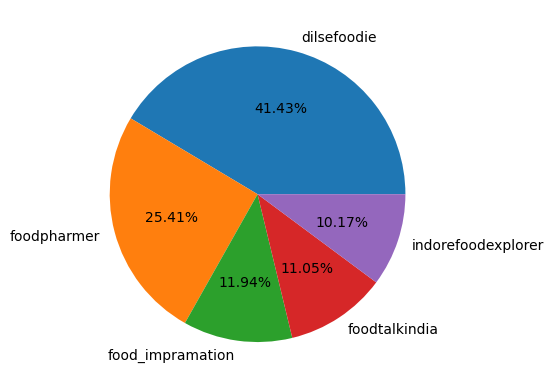

In [33]:
# to separate the followers name
top_5_followers = []
for i in top_5_handles:
    top_5_followers.append(i[1])

#to separte the top ids
top_5_ids = []
for i in top_5_handles:
    top_5_ids.append(i[0])

plt.pie(top_5_followers,labels = top_5_ids, autopct = "%.2f%%")
plt.show()

### 1.2 Now Find the number of posts these handles have done in the previous 3 days.

In [35]:
total_count = []
for i in top_5_ids:
    # open search button
    open1 = wait.until(EC.presence_of_element_located((By.XPATH, "//div[@class='x1iyjqo2 xh8yej3']/div[2]")))
    open1.click()
    time.sleep(5)
    # search for food
    c = wait.until(EC.presence_of_element_located((By.XPATH, "//div[@class = 'xjoudau x6s0dn4 x78zum5 xdt5ytf x1c4vz4f xs83m0k xrf2nzk x1n2onr6 xh8yej3 x1hq5gj4']/input")))
    c.send_keys(i)
    time.sleep(4)
    id_search = wait.until(EC.presence_of_element_located((By.XPATH, "//div[@class = 'x9f619 x78zum5 xdt5ytf x1iyjqo2 x6ikm8r x1odjw0f xh8yej3 xocp1fn']/a")))
    id_search.click()
    time.sleep(5)
    open1 = wait.until(EC.presence_of_element_located((By.XPATH, "//div[@class='x1iyjqo2 xh8yej3']/div[2]")))
    open1.click()
    time.sleep(4)
    a = wait.until(EC.presence_of_all_elements_located((By.XPATH,"//div[@class = '_ac7v  _al3n']/div[@class = '_aabd _aa8k  _al3l']")))
    count = 0
    time.sleep
    for j in range(len(a)):
        a[j].click()
        time.sleep(6)
        time1 = wait.until(EC.presence_of_element_located((By.XPATH, "//time[@class = '_aaqe']")))
        if time1.text == '1 DAY AGO' or time1.text == '2 DAYS AGO' or time1.text == '3 DAYS AGO':
            count+=1
        elif 'HOURS' in time1.text or 'HOUR' in time1.text:
            count+=1
        else:
            break
        close = wait.until(EC.presence_of_element_located((By.XPATH, "//div[@class = 'x160vmok x10l6tqk x1eu8d0j x1vjfegm']/div")))
        close.click()
    total_count.append(count)
    driver.back()
    time.sleep(6)

### 1.3 Depict this information using a suitable graph.

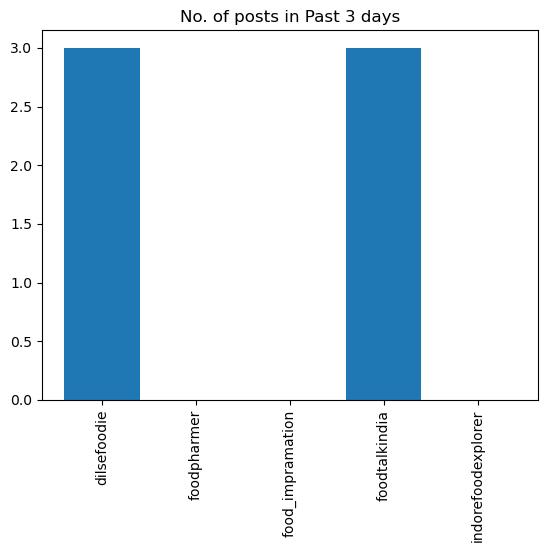

In [36]:
plt.bar(top_5_ids,total_count)
plt.xticks(rotation = 90)
plt.title('No. of posts in Past 3 days')
plt.show()

# 2. Your friend also needs a list of hashtags that he should use in his posts. 

In [37]:
# Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.
# Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.
# Create a csv file with two columns : the word and its frequency
# Now, find the hashtags that were most popular among these bloggers
# Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

In [44]:
hashtags = {}
for m in top_5_ids:
    
    # open search button
    open1 = wait.until(EC.presence_of_element_located((By.XPATH, "//div[@class='x1iyjqo2 xh8yej3']/div[2]")))
    open1.click()
    time.sleep(5)
    
    # search for food
    c = wait.until(EC.presence_of_element_located((By.XPATH, "//div[@class = 'xjoudau x6s0dn4 x78zum5 xdt5ytf x1c4vz4f xs83m0k xrf2nzk x1n2onr6 xh8yej3 x1hq5gj4']/input")))
    c.send_keys(m)
    time.sleep(4)
    
    id_search = wait.until(EC.presence_of_element_located((By.XPATH, "//div[@class = 'x9f619 x78zum5 xdt5ytf x1iyjqo2 x6ikm8r x1odjw0f xh8yej3 xocp1fn']/a")))
    id_search.click()
    time.sleep(5)
    
    open1 = wait.until(EC.presence_of_element_located((By.XPATH, "//div[@class='x1iyjqo2 xh8yej3']/div[2]")))
    open1.click()
    time.sleep(4)
    
    a = wait.until(EC.presence_of_all_elements_located((By.XPATH,"//div[@class = '_ac7v  _al3n']/div[@class = '_aabd _aa8k  _al3l']")))
    a = a[:10]
    for i in a:
        time.sleep(2)
        i.click()
        time.sleep(5)
        try:
            content = wait.until(EC.presence_of_all_elements_located((By.XPATH,"//div[@class = '_a9zs']/h1/a")))
            for j in content:
                if j.text in hashtags:
                    hashtags[j.text] += 1
                else:
                    hashtags[j.text] = 1
        except TimeoutException:
            print('No Hashtags used in this post')
                
        driver.back()

# #converting to CSV        
# columns = {'Words':words,'Frequency':frequency}
# data = pd.DataFrame(columns)
# data.to_csv(r'WordFrequency.csv', index=False)

No Hashtags used in this post
No Hashtags used in this post
No Hashtags used in this post
No Hashtags used in this post
No Hashtags used in this post
No Hashtags used in this post


In [47]:
words = []
frequency = []
for key,value in hashtags.items():
    words.append(key)
    frequency.append(value)
columns = {'Words':words,'Frequency':frequency}
data = pd.DataFrame(columns)
data.to_csv(r'overall_frequency.csv', index=False)

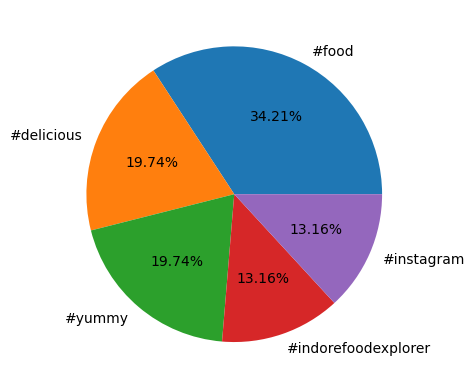

In [48]:
top_5_hashtags = sorted(hashtags.items(), key=lambda x: x[1])[::-1][:5]
words = []
for i in top_5_hashtags:
    words.append(i[0])

#to separte the top ids
frequency = []
for i in top_5_hashtags:
    frequency.append(i[1])

plt.pie(frequency,labels = words, autopct = "%.2f%%")
plt.show()

# 3.You need to also calculate average followers : likes ratio for the obtained handles. Followers : Likes ratio is calculated as follows:

In [ ]:
# Find out the likes of the top 10 posts of the 5 handles obtained earlier.
# Calculate the average likes for a handle.
# Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.
# Create a bar graph to depict the above obtained information.

In [59]:
likes_each_account = []
for m in top_5_ids:
    
    # open search button
    open1 = wait.until(EC.presence_of_element_located((By.XPATH, "//div[@class='x1iyjqo2 xh8yej3']/div[2]")))
    open1.click()
    time.sleep(6)
    
    # search for food
    c = wait.until(EC.presence_of_element_located((By.XPATH, "//div[@class = 'xjoudau x6s0dn4 x78zum5 xdt5ytf x1c4vz4f xs83m0k xrf2nzk x1n2onr6 xh8yej3 x1hq5gj4']/input")))
    c.send_keys(m)
    time.sleep(6)
    
    id_search = wait.until(EC.presence_of_element_located((By.XPATH, "//div[@class = 'x9f619 x78zum5 xdt5ytf x1iyjqo2 x6ikm8r x1odjw0f xh8yej3 xocp1fn']/a")))
    id_search.click()
    time.sleep(6)
    
    open1 = wait.until(EC.presence_of_element_located((By.XPATH, "//div[@class='x1iyjqo2 xh8yej3']/div[2]")))
    open1.click()
    time.sleep(6)
    
    total_like = 0
    a = wait.until(EC.presence_of_all_elements_located((By.XPATH,"//div[@class = '_ac7v  _al3n']/div[@class = '_aabd _aa8k  _al3l']")))
    a = a[:10]
    for i in a:
        i.click()
        time.sleep(3)
        try:
            z = wait.until(EC.presence_of_element_located((By.XPATH,"//span[@class = 'x193iq5w xeuugli x1fj9vlw x13faqbe x1vvkbs xt0psk2 x1i0vuye xvs91rp x1s688f x5n08af x10wh9bi x1wdrske x8viiok x18hxmgj']/span")))
            like_each_post = int(z.text.replace(',',''))
            total_like = total_like + like_each_post
        except TimeoutException:
            print('TimeoutException')
        driver.back()
        time.sleep(3)
    likes_each_account.append(total_like)

TimeoutException
TimeoutException
TimeoutException
TimeoutException


---------------------------------
Total Likes for 10 Posts
---------------------------------
dilsefoodie : 142484
foodpharmer : 1600945
food_impramation : 253800
foodtalkindia : 4744
indorefoodexplorer : 66348
---------------------------------
Average Likes
---------------------------------
dilsefoodie : 14248
foodpharmer : 160094
food_impramation : 25380
foodtalkindia : 474
indorefoodexplorer : 6635
---------------------------------
Ratio Avg Followers : Avg Likes
---------------------------------
dilsefoodie : 82
foodpharmer : 4
food_impramation : 13
foodtalkindia : 654
indorefoodexplorer : 43


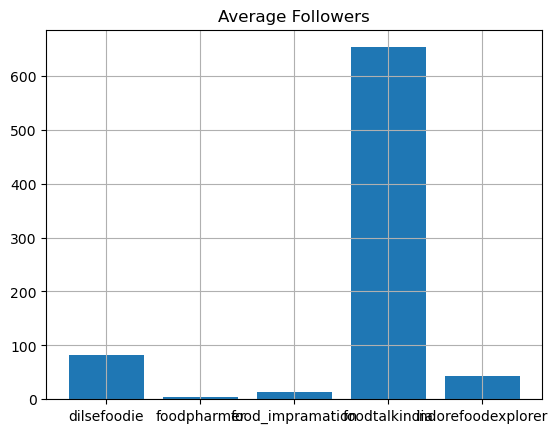

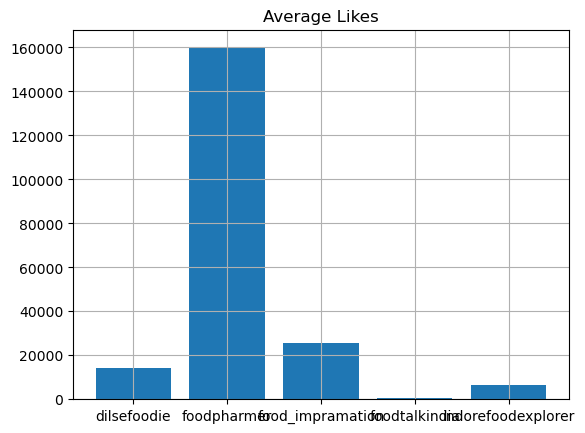

In [68]:
print("---------------------------------")
print("Total Likes for 10 Posts")
print("---------------------------------")

for i in range(len(likes_each_account)):
    print(top_5_ids[i], ':', likes_each_account[i])
    
    
# Calculate the average likes for a handle.
print("---------------------------------")
print("Average Likes")
print("---------------------------------")
# To store the average_likes for each handle
average_like_list = []
for i in range(len(likes_each_account)):
    average_like = likes_each_account[i]/10
    average_like_list.append(average_like)
    print(top_5_ids[i], ':', format(average_like,'.0f'))
 

# to get the average followers
print("---------------------------------")
print("Ratio Avg Followers : Avg Likes")
print("---------------------------------")

avg_followers_list = []
for i in range(len(likes_each_account)):
    average_followers = top_5_followers[i]/average_like_list[i]
    avg_followers_list.append(average_followers)
    print(top_5_ids[i], ':', format(average_followers,'.0f'))
    
plt.bar(top_5_ids,avg_followers_list)
plt.title('Average Followers')
plt.grid()
plt.show()

plt.bar(top_5_ids,average_like_list)
plt.title('Average Likes')
plt.grid()
plt.show()